# Explorative Datenanalyse

Im fogenden Notebook ist die explorative Datenanalyse von den 11'760 SRF Artikeln zu 12 unterschielichen Nachnamen.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import squarify
import sys
sys.path.append('../')
from src.eda import (info_categories,
                     plot_articles_per_cat,
                     plot_cat_per_term,
                     plot_cat_per_term_grid,
)

## Daten einlesen

In [2]:
data = pd.read_csv('../output/df_namen.csv')
data

,Suchbegriff,Titel,Datum,Autor,Kategorie,Unterkategorie
0,Torres,Wechsel von Torres zu Barcelona fix – Mbabu fe...,"28.12.2021, 14:05 Uhr",Unbekannt,Sport,Fussball
1,Torres,Aegerter verpasst das Wunder – Gesamtsieg an T...,"11.10.2020, 14:28 Uhr",Unbekannt,Sport,Motorsport
2,Torres,Honorar von Dufry-Präsident Torres Carretero g...,"30.07.2019, 18:55 Uhr",Lorenzo Bonati,News,Wirtschaft
3,Torres,Torres kündigt Rücktritt an,"20.06.2019, 19:00 Uhr",Unbekannt,Sport,Fussball
4,Torres,Iniesta und Torres sagen «Adios»,"20.05.2018, 22:03 Uhr",Unbekannt,Sport,Fussball
...,...,...,...,...,...,...
11755,Luder,So will die Stadt Luzern ihr Parkplatzproblem ...,"19.05.2020, 10:00 Uhr",Unbekannt,News,News
11756,Luder,Luzerner Kantonsrat verlangt Transparenz über ...,"18.05.2020, 16:18 Uhr",Unbekannt,News,News
11757,Luder,Luzerner Kantonsparlament verschiebt Corona-De...,"17.05.2020, 15:08 Uhr",Unbekannt,News,News
11758,Luder,Luzern trainiert bereits am 18. Mai wieder,"16.05.2020, 11:30 Uhr",Unbekannt,Sport,Fussball


## Erster Überblick

### Nachnamen - Kategorie

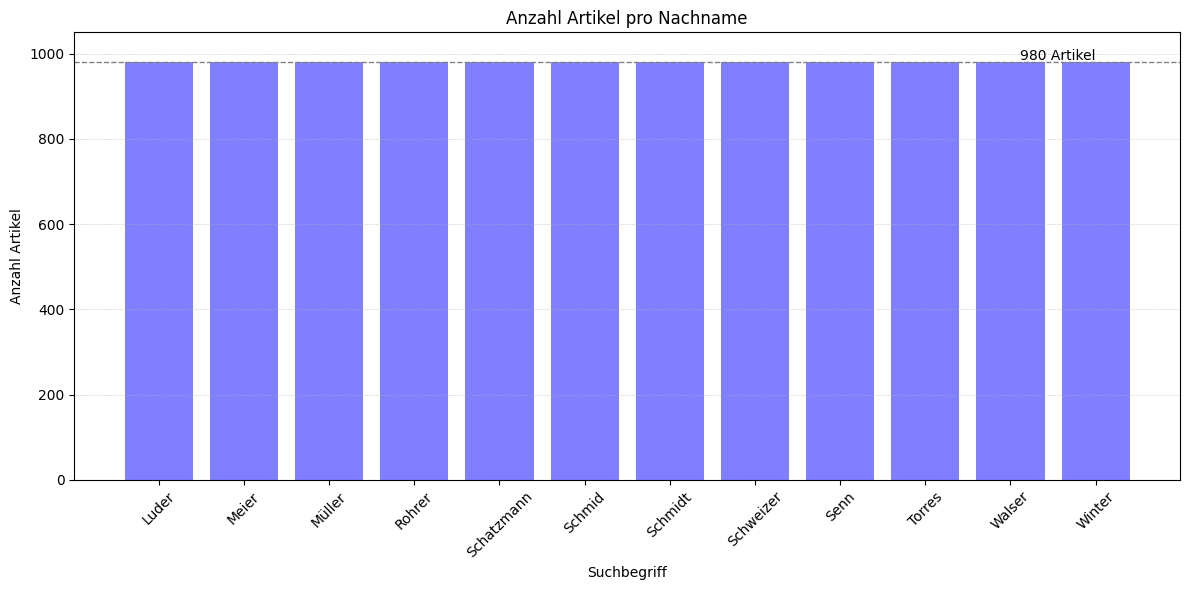

In [27]:
# visueller doppelcheck, dass es pro Nachnamen 980 Artikel gibt
counts = data['Suchbegriff'].value_counts().sort_index()
plt.figure(figsize=(12, 6))
bars = plt.bar(counts.index, counts.values, color='blue', alpha=0.5)
# Einheitliche Y-Achse für visuelle Vergleichbarkeit
plt.ylim(0, 1050)
# Horizontale Linie einzeichnen, um Gleichverteilung zu verdeutlichen
plt.axhline(y=980, color='gray', linestyle='--', linewidth=1)
plt.text(len(counts) - 1, 985, '980 Artikel', ha='right', color='black')
plt.xlabel('Suchbegriff')
plt.ylabel('Anzahl Artikel')
plt.title('Anzahl Artikel pro Nachname')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle=':', linewidth=0.5)
plt.tight_layout()
plt.show()


Man erkennt in dem Plot, dass alle Nachnamen genau 980 Artikel haben. Das bedeutet, dass das Scraping erfolgreich war und alle Artikel gleich viele Artikel haben.

In [4]:
# Anzahl Artikel je Kategorie über das gesamte df
info_categories(data, "Kategorie")

info_categories(data, 'Unterkategorie')

Distinct count of Kategorie: 159

Kategorie
Sport                   4476
News                    4366
Kultur                  1157
Radio SRF 3              236
Glanz & Gloria           204
Wissen                   193
Radio SRF 1              171
Radio SRF Musikwelle     146
Kassensturz Espresso     142
Meteo                    124
Name: count, dtype: int64

Distinct count of Unterkategorie: 159

Unterkategorie
News                       1821
Fussball                   1705
Schweiz                    1377
Mehr Sport                 1229
Eishockey                  1089
International               755
Film & Serien               437
Wirtschaft                  297
Gesellschaft & Religion     250
Glanz & Gloria              191
Name: count, dtype: int64



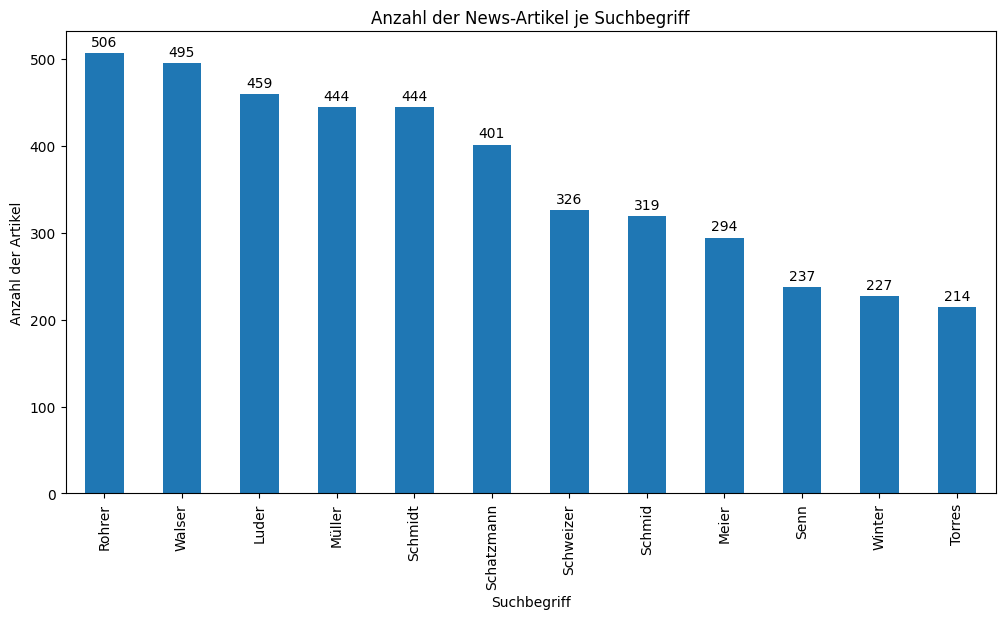

In [5]:
# für eine beliebige Kategorie die Anzahl Artikel je Nachnamen
plot_articles_per_cat(data, "News")

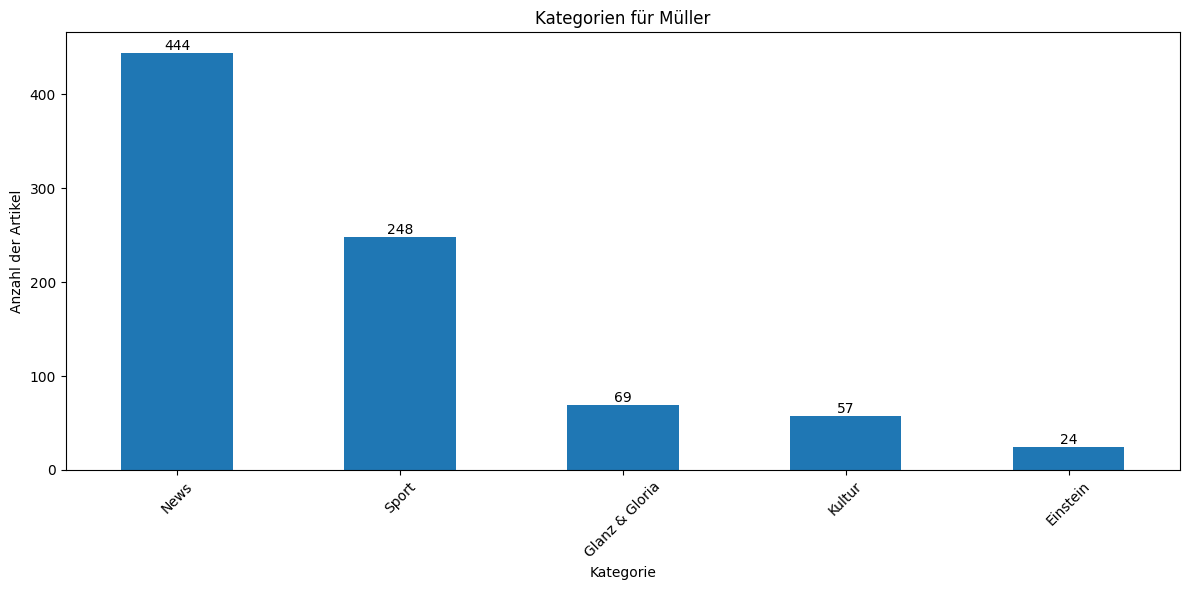

In [6]:
# Für beliebigen Nachnamen die top 5 Kategorien
plot_cat_per_term(data, "Müller")

Die obigen zwei Plots geben einen ersten Überblick übe die Verteilung der Kategorien in Bezug auf die Nachnamen. So hat zu, Beispiel der Nachname *Rohrer* die meisten Artikel in der Kategorie *News*, während *Torres* die wenigsten hat. 


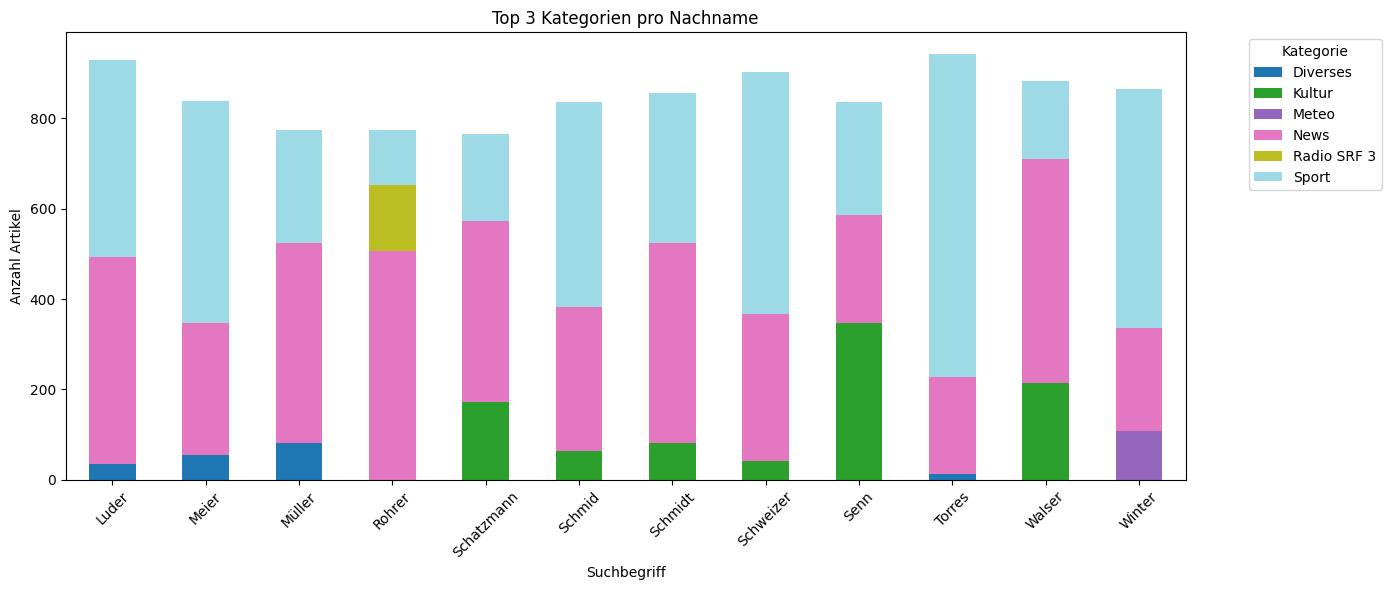

In [ ]:
# Top 3 Kategorien je Suchbegriff extrahieren
top3_per_name = (
    data.groupby(['Suchbegriff', 'Kategorie'])
    .size()
    .reset_index(name='count')
    .sort_values(['Suchbegriff', 'count'], ascending=[True, False])
    .groupby('Suchbegriff')
    .head(3)
)
pivot_df = top3_per_name.pivot(index='Suchbegriff', columns='Kategorie', values='count').fillna(0)
pivot_df.plot(kind='bar', stacked=True, figsize=(14, 6), colormap='tab20')
plt.xlabel('Suchbegriff')
plt.ylabel('Anzahl Artikel')
plt.title('Top 3 Kategorien pro Nachname')
plt.legend(title='Kategorie', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In der Grafik werden pro Nachname die 3 häufigsten Kategorien angezeigt. Man erkennt eindeutig, dass die Kategorien *Sport* und *News* die häufigsten Kategorien sind.

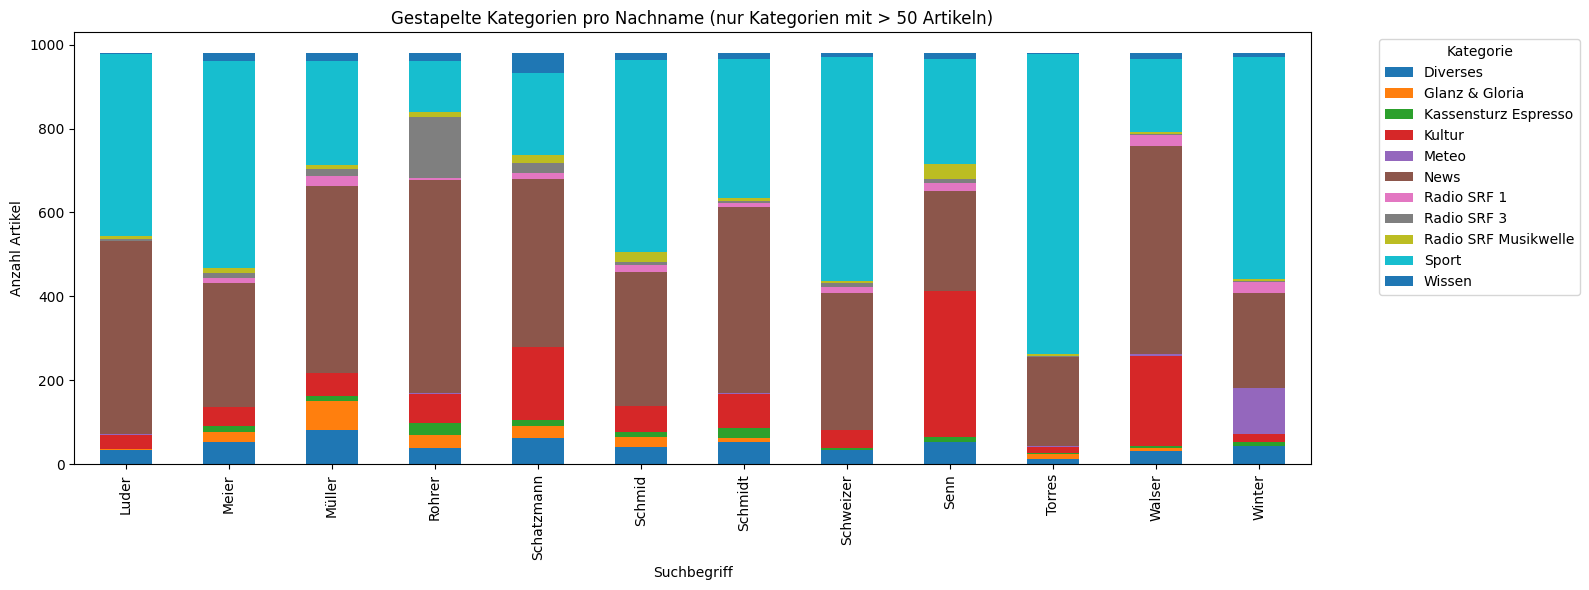

In [ ]:
# für alle Nachnamen die Kategorien von denen es mehr wie 50 Artikel gibt anzeigen
category_counts = data.groupby(['Suchbegriff', 'Kategorie']).size().unstack(fill_value=0)
filtered_category_counts = category_counts.loc[:, category_counts.sum() > 50]s
filtered_category_counts.plot(kind='bar', stacked=True, figsize=(16, 6))
plt.xlabel('Suchbegriff')
plt.ylabel('Anzahl Artikel')
plt.title('Gestapelte Kategorien pro Nachname (nur Kategorien mit > 50 Artikeln)')
plt.legend(title='Kategorie', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


Dieser Plot ist ähnlich zum obigen, zeigt jedoch alle Kategorien, welche mehr als 50 Artikel haben. Die anderen Kateogrien sind im Vergleich zu *Sport* und *News* sehr wenig vertreten.

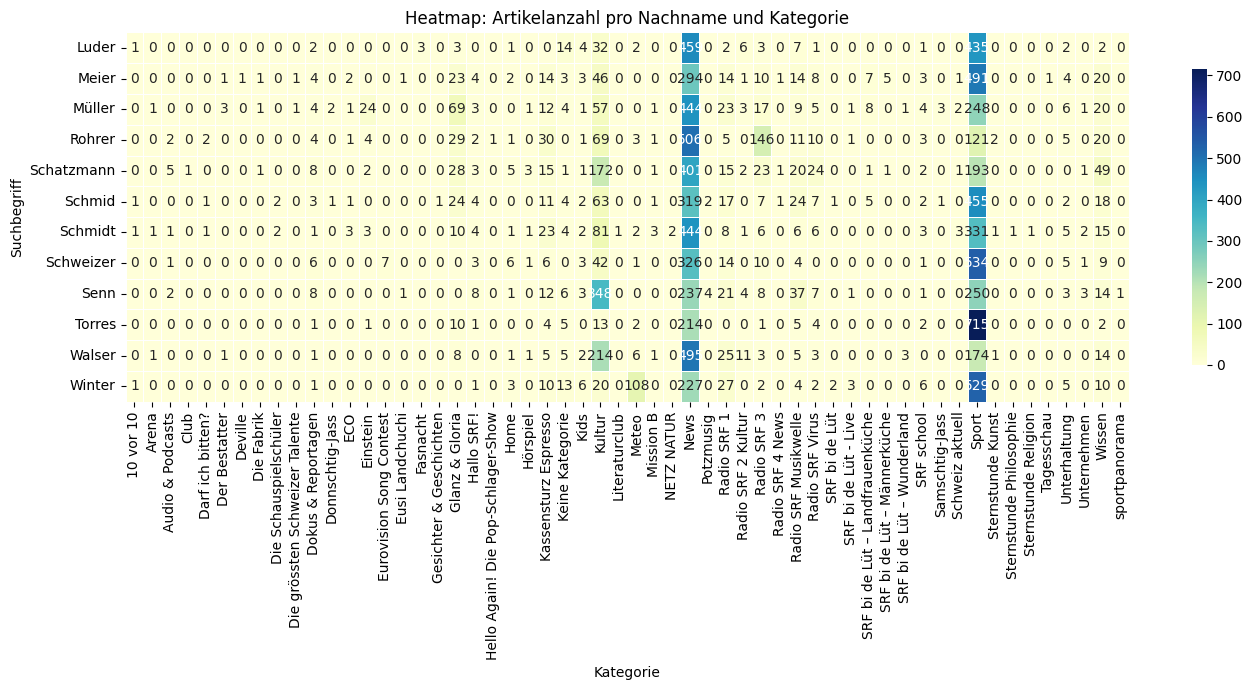

In [ ]:
# plt.figure(figsize=(14, 7))
# sns.heatmap(category_counts, annot=True, fmt='d', cmap='YlGnBu', linewidths=0.5, cbar_kws={'shrink': 0.8})
# plt.xlabel('Kategorie')
# plt.ylabel('Suchbegriff')
# plt.title('Heatmap: Artikelanzahl pro Nachname und Kategorie')
# plt.tight_layout()
# plt.show()

#wollen wir löschen, finde es schwer zu lesen

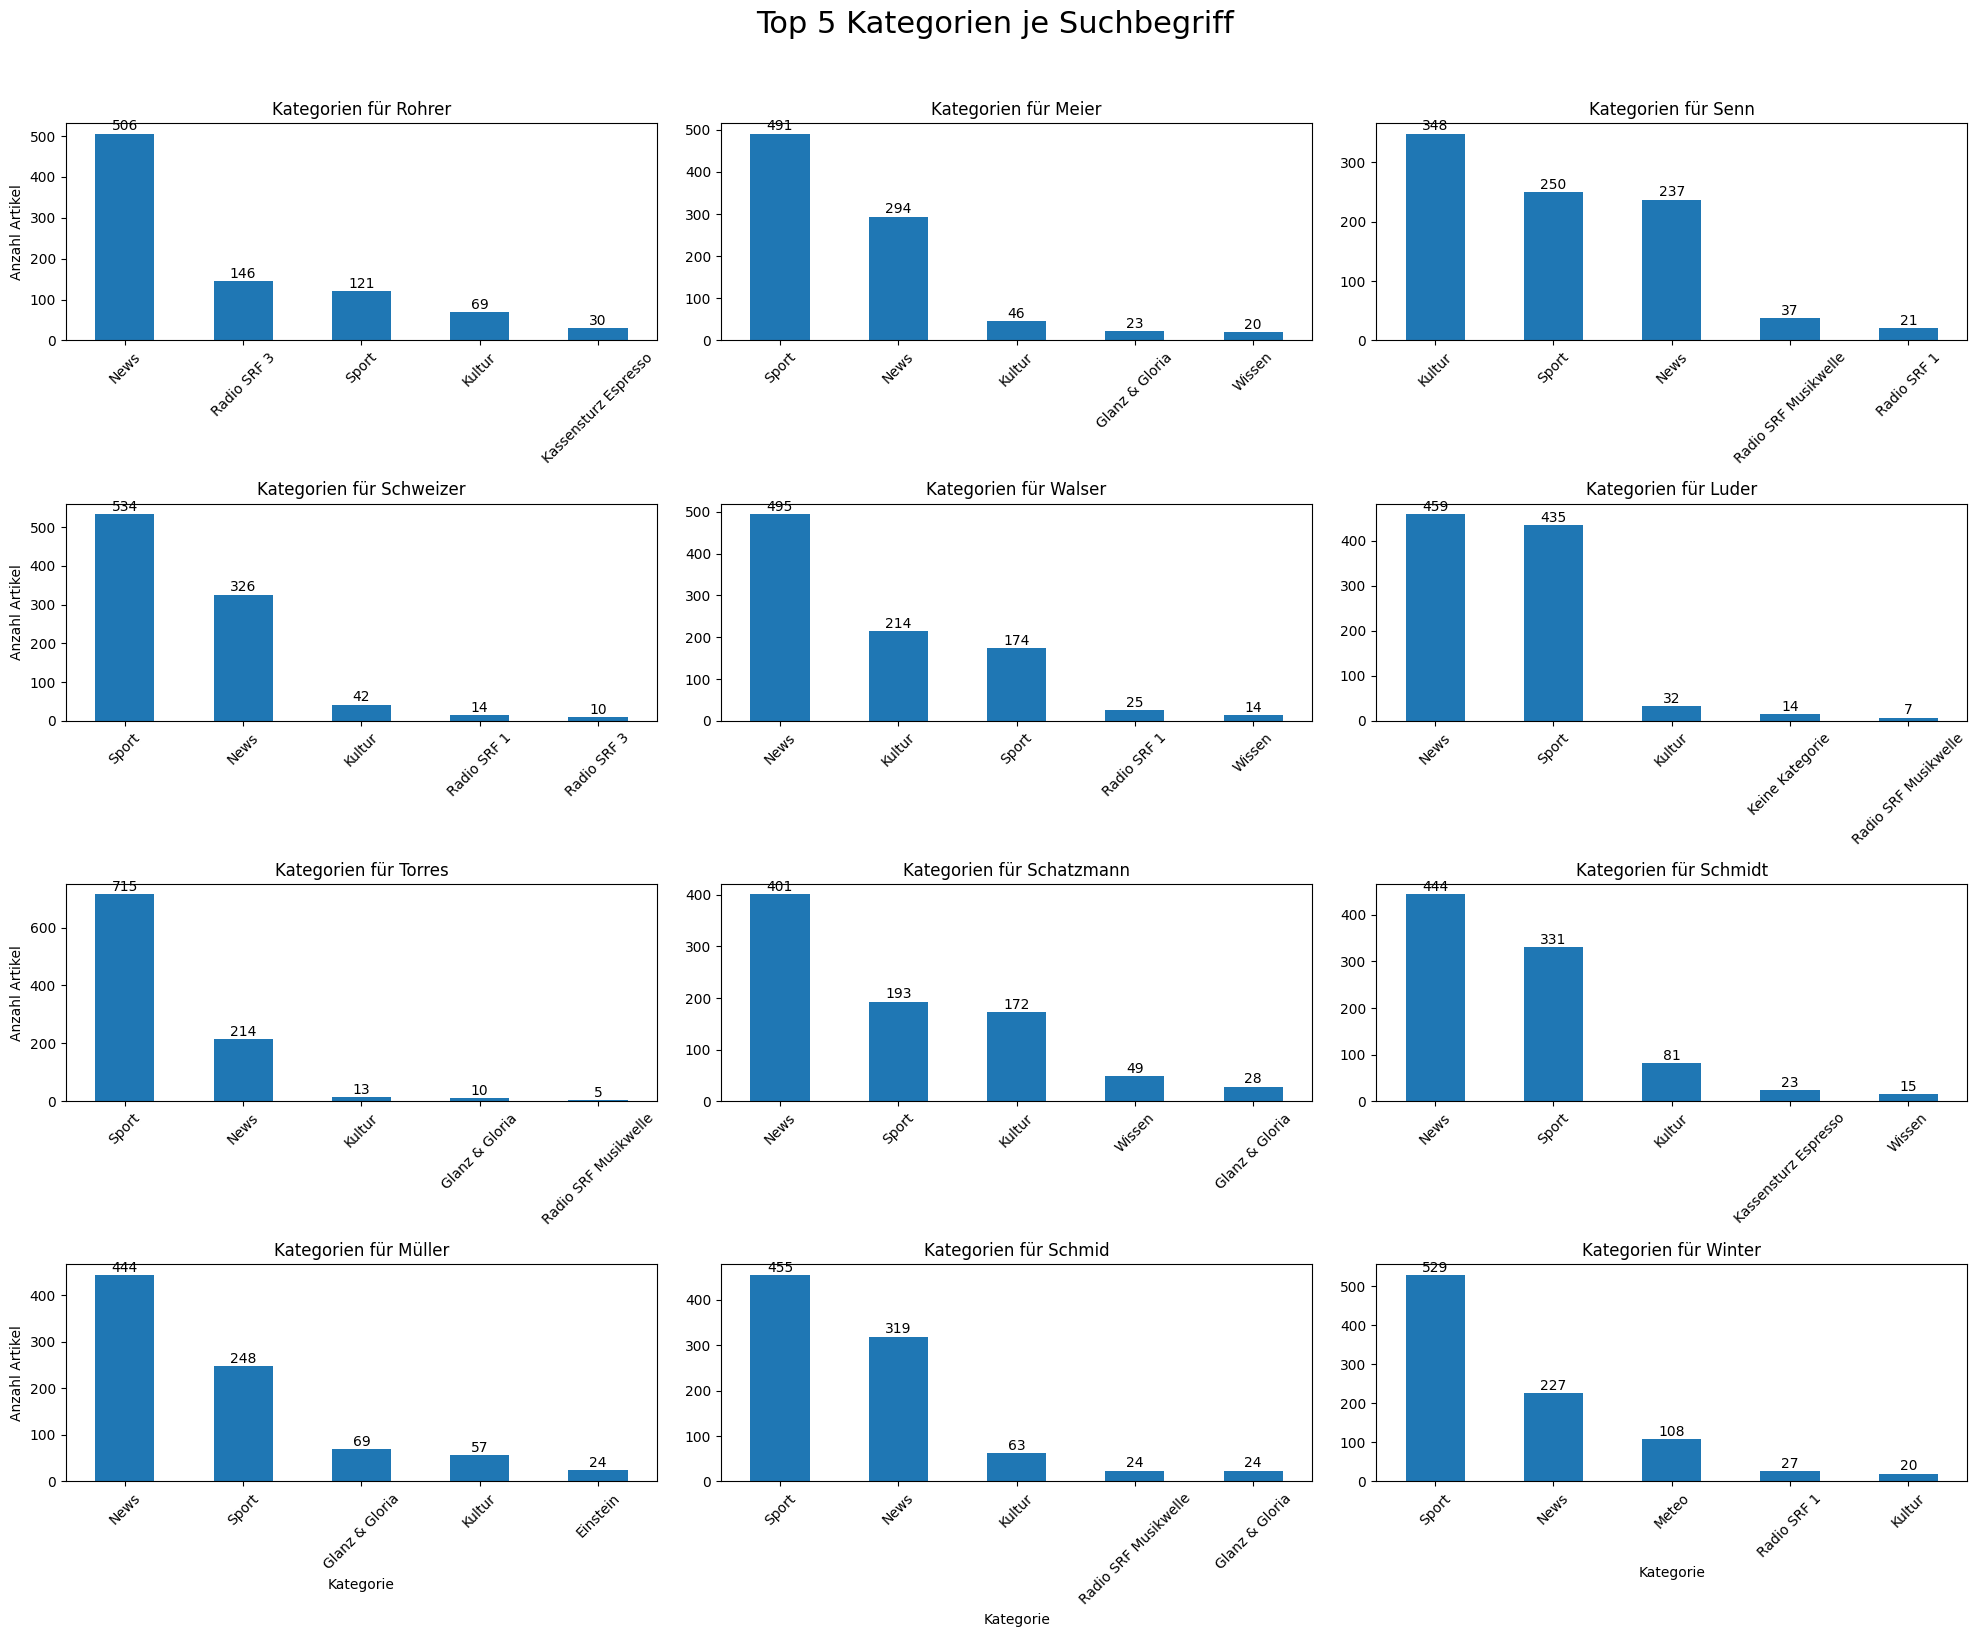

In [11]:
# Beispiel-Aufruf:
suchbegriffe = [
    "Rohrer", "Meier", "Senn", 
    "Schweizer", "Walser", "Luder", 
    "Torres", "Schatzmann", "Schmidt",
    "Müller", "Schmid", "Winter"
]
plot_cat_per_term_grid(data, suchbegriffe)


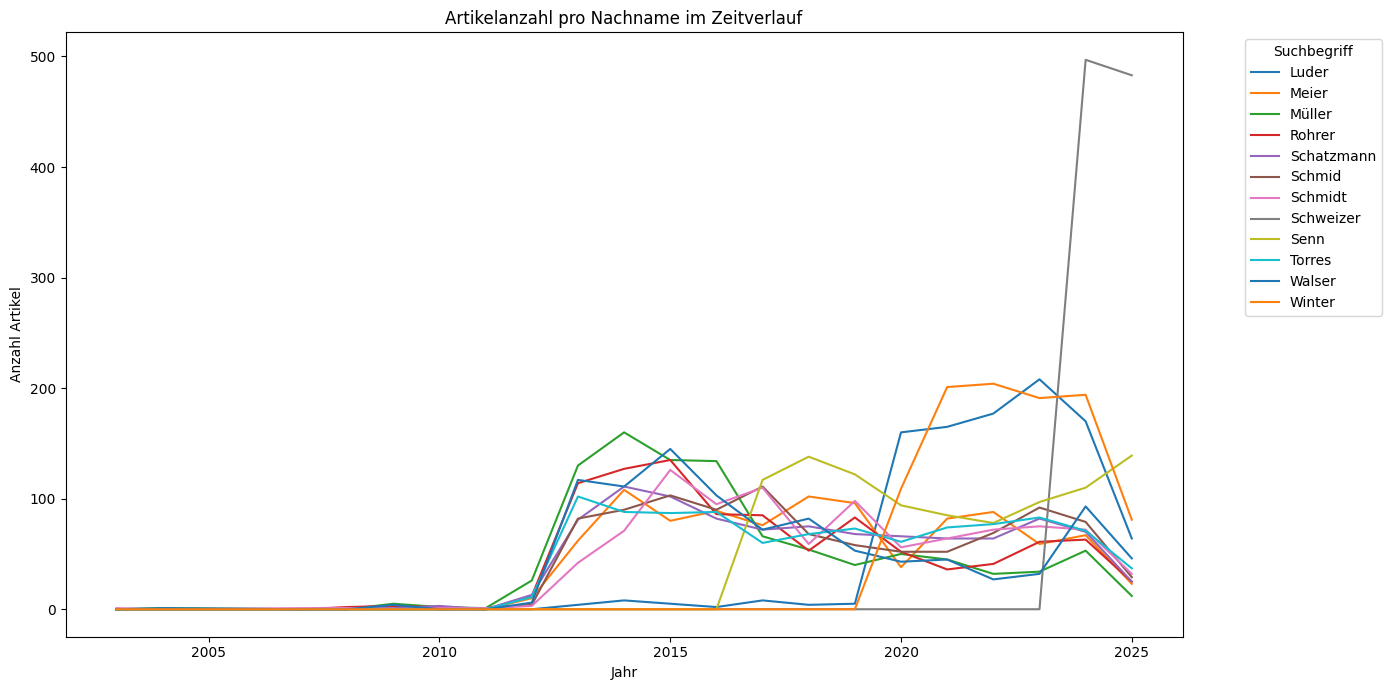

In [12]:
# Datum in ein Datetime-Objekt umwandeln
data['Datum_clean'] = pd.to_datetime(data['Datum'].str.extract(r'(\d{2}\.\d{2}\.\d{4})')[0], format='%d.%m.%Y', errors='coerce')

# Nach Jahr gruppieren
data['Jahr'] = data['Datum_clean'].dt.year
yearly_counts = data.groupby(['Jahr', 'Suchbegriff']).size().unstack(fill_value=0)

yearly_counts.plot(figsize=(14, 7))
plt.xlabel('Jahr')
plt.ylabel('Anzahl Artikel')
plt.title('Artikelanzahl pro Nachname im Zeitverlauf')
plt.legend(title='Suchbegriff', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

### Nachnamen - Unterkategorie

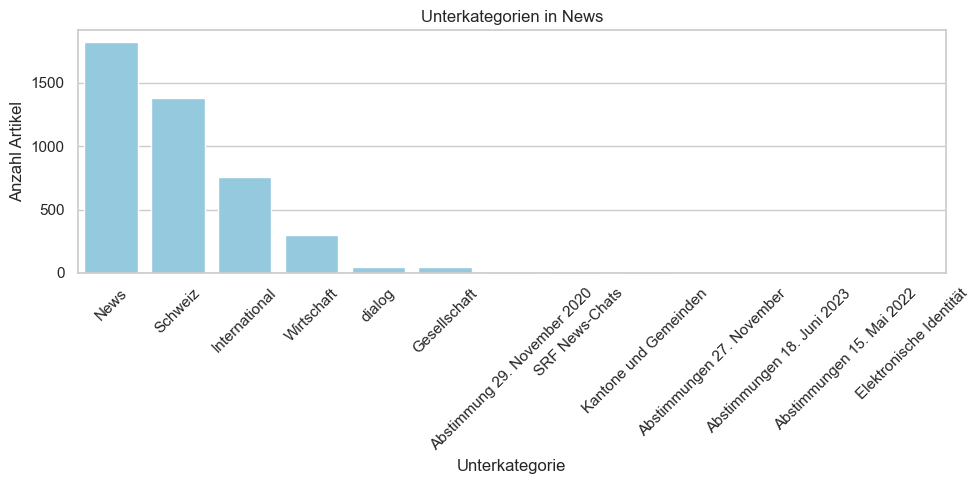

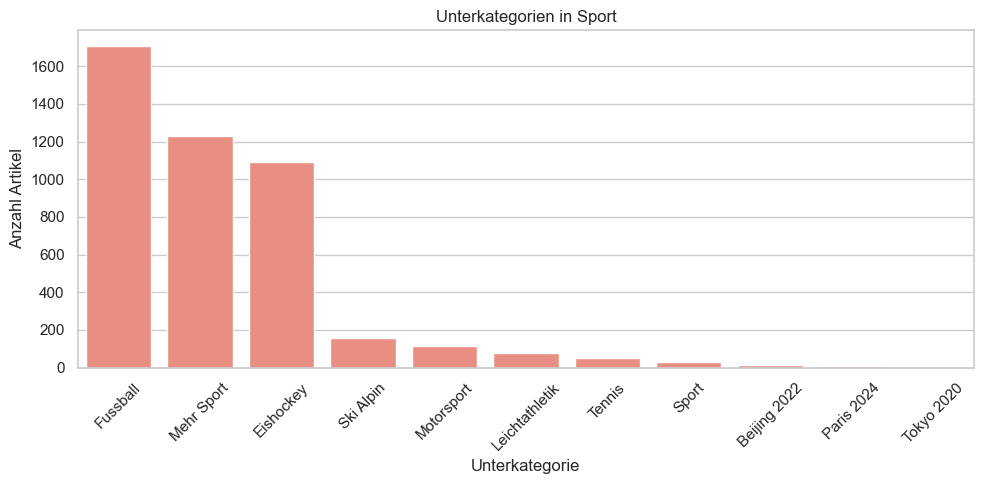

In [47]:
# Unterkategorien für News und Sport
# Filter für News
news_data = data[data['Kategorie'] == 'News']
news_counts = news_data['Unterkategorie'].value_counts()

# Plot für News
plt.figure(figsize=(10, 5))
sns.barplot(x=news_counts.index, y=news_counts.values, color='skyblue')
plt.title('Unterkategorien in News')
plt.xlabel('Unterkategorie')
plt.ylabel('Anzahl Artikel')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Filter für Sport
sport_data = data[data['Kategorie'] == 'Sport']
sport_counts = sport_data['Unterkategorie'].value_counts()

# Plot für Sport
plt.figure(figsize=(10, 5))
sns.barplot(x=sport_counts.index, y=sport_counts.values, color='salmon')
plt.title('Unterkategorien in Sport')
plt.xlabel('Unterkategorie')
plt.ylabel('Anzahl Artikel')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Das sind die häufigsten Unterkategorien der Kategorien *Sport* und *News*. Bei der Kategorie *News* ist die häufigste Unterkategorie *News*

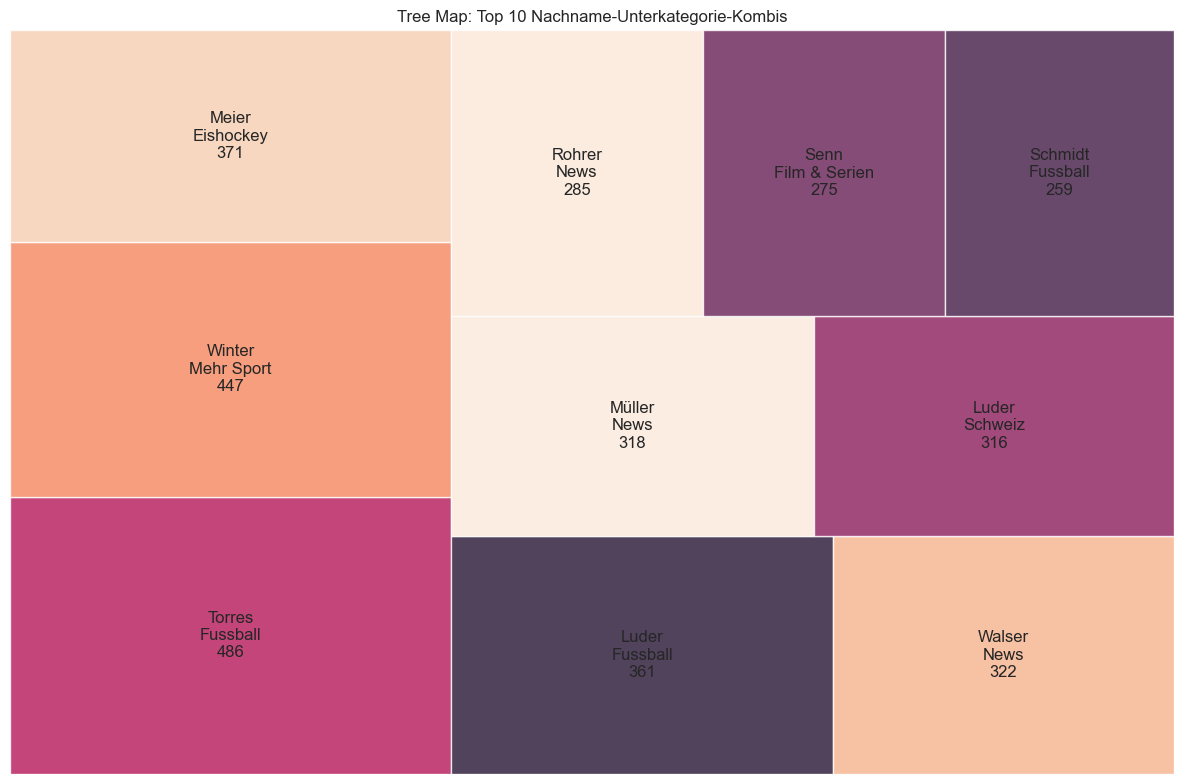

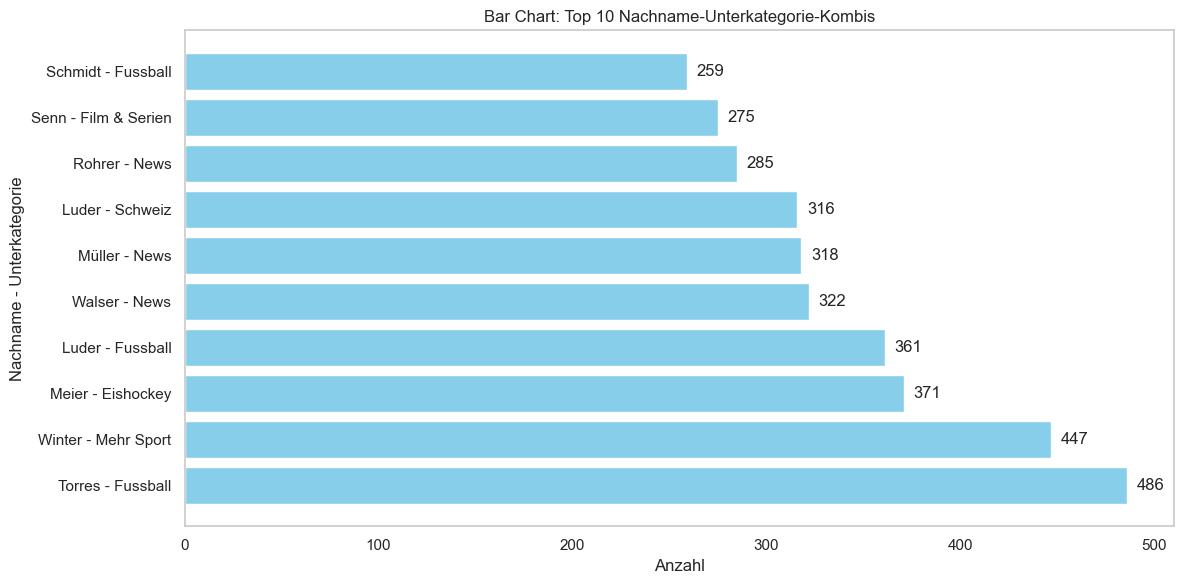

In [50]:
# Top 10 Kombinationen für Übersichtlichkeit
top_combos = data.groupby(['Suchbegriff', 'Unterkategorie']).size().sort_values(ascending=False).head(10)
labels = [f"{i[0]}\n{i[1]}\n{v}" for i, v in top_combos.items()]
sizes = top_combos.values

plt.figure(figsize=(12, 8))
squarify.plot(sizes=sizes, label=labels, alpha=0.8)
plt.title('Tree Map: Top 10 Nachname-Unterkategorie-Kombis')
plt.axis('off')
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
bars = plt.barh([f"{i[0]} - {i[1]}" for i in top_combos.index], sizes, color='skyblue')
plt.xlabel('Anzahl')
plt.ylabel('Nachname - Unterkategorie')

# Anzahl der Artikel rechts neben den Bars anzeigen
for bar, size in zip(bars, sizes):
    plt.text(bar.get_width() + 5, bar.get_y() + bar.get_height() / 2, str(size), va='center')
plt.title('Bar Chart: Top 10 Nachname-Unterkategorie-Kombis')
plt.tight_layout()
plt.grid(False)
plt.show()


Die häufigsten Kombinationen von Nachnamen und Unterkategorien sind in der Grafik dargestellt. Am häufigsten ist die Kombination *Torres* und *Fussball* vertreten. 

### Autoren

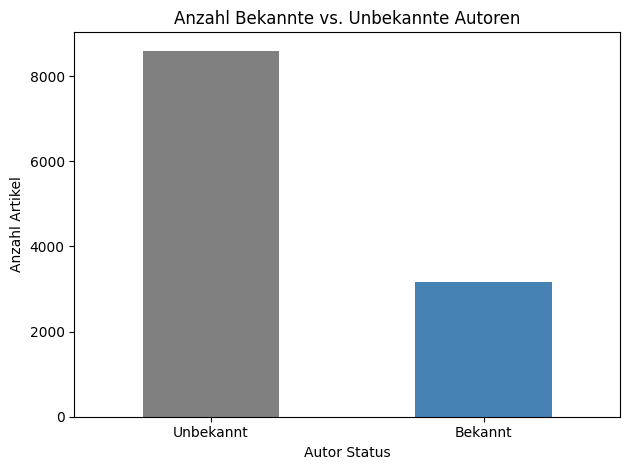

In [41]:
# Anzahl Artikel pro Autor
# Definiere unbekannte Autoren
unknown_labels = ['unknown', 'unbekannt', 'na', 'n/a', '']  # erweiterbar je nach Daten
data['Autor_clean'] = data['Autor'].fillna('unknown').str.strip().str.lower()

# Gruppierung in bekannt/unknown
data['Autor_status'] = data['Autor_clean'].apply(lambda x: 'Unbekannt' if x in unknown_labels else 'Bekannt')
counts = data['Autor_status'].value_counts()

# Plot
counts.plot(kind='bar', color=['gray', 'steelblue'])
plt.title('Anzahl Bekannte vs. Unbekannte Autoren')
plt.ylabel('Anzahl Artikel')
plt.xlabel('Autor Status')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

Wir haben sehr viele unbekannte Artikel (über 8500)

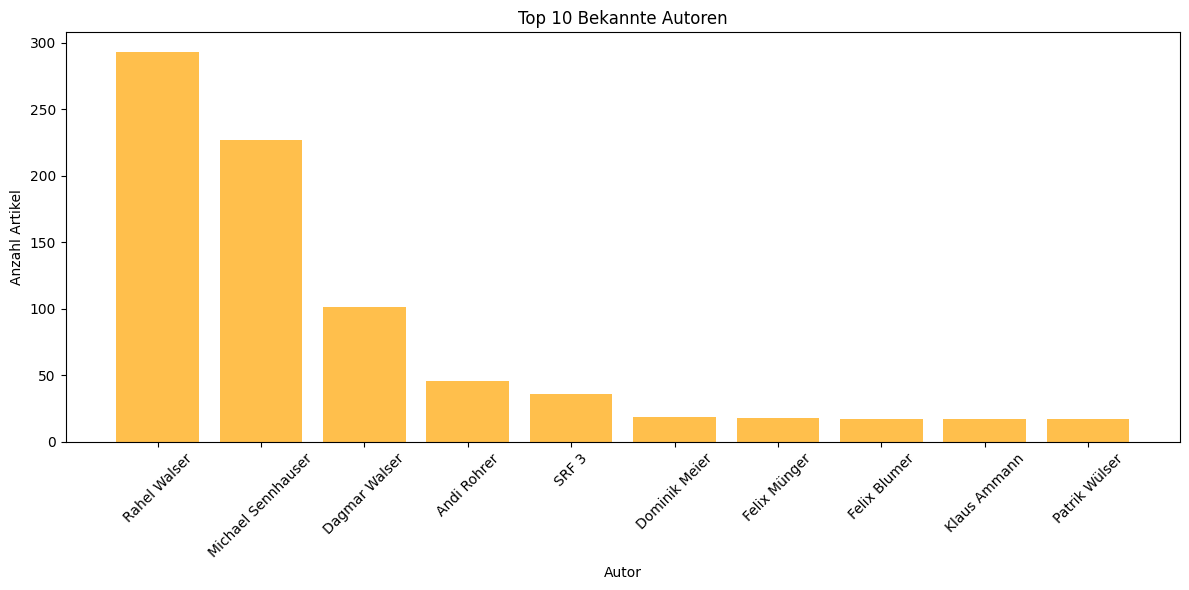

In [42]:
# Definiere "unbekannte" Autoren
unknown_labels = ['unknown', 'unbekannt', 'n/a', '', 'na']
author_series = data['Autor'].fillna('').str.strip().str.lower()

# Bekannte Autoren filtern
known_authors = data[~author_series.isin(unknown_labels)]

# Top 10 bekannte Autoren zählen
author_counts = known_authors['Autor'].value_counts().head(10)

# Plot
plt.figure(figsize=(12, 6))
bars = plt.bar(author_counts.index, author_counts.values, color='orange', alpha=0.7)
plt.xlabel('Autor')
plt.ylabel('Anzahl Artikel')
plt.title('Top 10 Bekannte Autoren')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Das sind die 10 häufisgten Autoren, wobei ein Autor SRF3 ist und einer Rohrer im Namen hat.

# Analyse über die gereinigentn Daten

In [13]:
top_categories = data['Kategorie'].value_counts().head(10).index
data['Kategorie'] = data['Kategorie'].apply(lambda x: x if x in top_categories else 'Diverses')

In [14]:
data

,Suchbegriff,Titel,Datum,Autor,Kategorie,Unterkategorie,Datum_clean,Jahr
0,Torres,Wechsel von Torres zu Barcelona fix – Mbabu fe...,"28.12.2021, 14:05 Uhr",Unbekannt,Sport,Fussball,2021-12-28,2021
1,Torres,Aegerter verpasst das Wunder – Gesamtsieg an T...,"11.10.2020, 14:28 Uhr",Unbekannt,Sport,Motorsport,2020-10-11,2020
2,Torres,Honorar von Dufry-Präsident Torres Carretero g...,"30.07.2019, 18:55 Uhr",Lorenzo Bonati,News,Wirtschaft,2019-07-30,2019
3,Torres,Torres kündigt Rücktritt an,"20.06.2019, 19:00 Uhr",Unbekannt,Sport,Fussball,2019-06-20,2019
4,Torres,Iniesta und Torres sagen «Adios»,"20.05.2018, 22:03 Uhr",Unbekannt,Sport,Fussball,2018-05-20,2018
...,...,...,...,...,...,...,...,...
11755,Luder,So will die Stadt Luzern ihr Parkplatzproblem ...,"19.05.2020, 10:00 Uhr",Unbekannt,News,News,2020-05-19,2020
11756,Luder,Luzerner Kantonsrat verlangt Transparenz über ...,"18.05.2020, 16:18 Uhr",Unbekannt,News,News,2020-05-18,2020
11757,Luder,Luzerner Kantonsparlament verschiebt Corona-De...,"17.05.2020, 15:08 Uhr",Unbekannt,News,News,2020-05-17,2020
11758,Luder,Luzern trainiert bereits am 18. Mai wieder,"16.05.2020, 11:30 Uhr",Unbekannt,Sport,Fussball,2020-05-16,2020


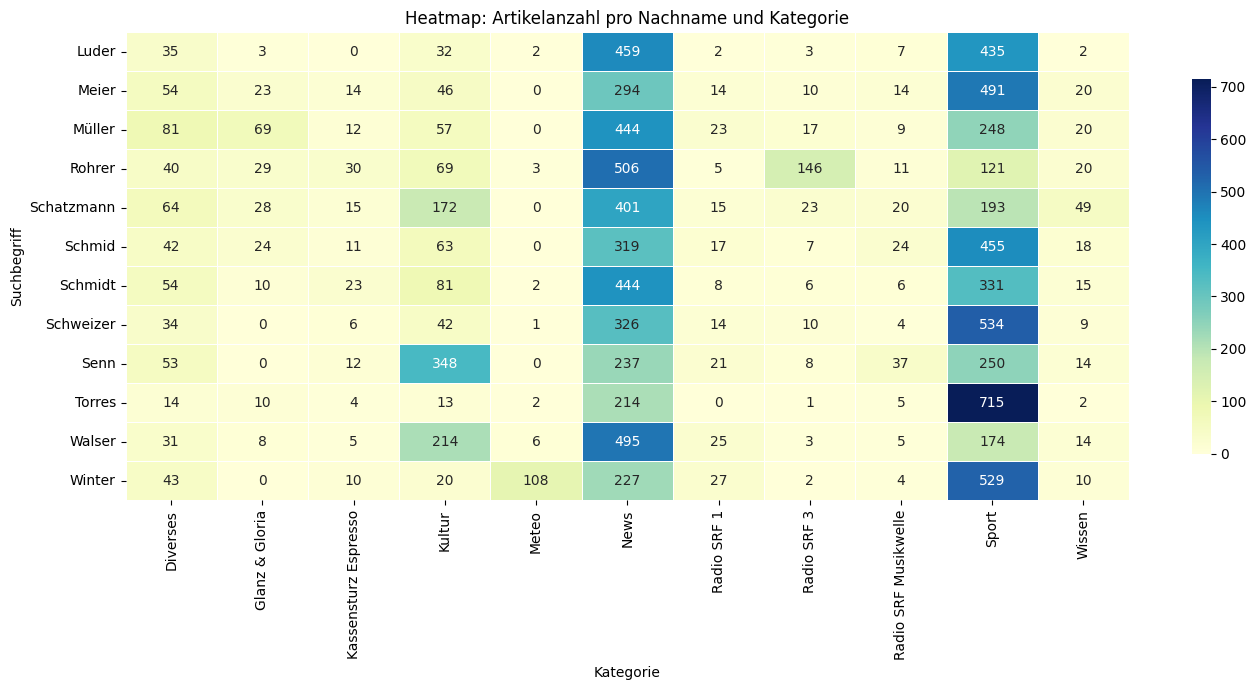

In [15]:
category_counts = data.groupby(['Suchbegriff', 'Kategorie']).size().unstack(fill_value=0)


plt.figure(figsize=(14, 7))
sns.heatmap(category_counts, annot=True, fmt='d', cmap='YlGnBu', linewidths=0.5, cbar_kws={'shrink': 0.8})
plt.xlabel('Kategorie')
plt.ylabel('Suchbegriff')
plt.title('Heatmap: Artikelanzahl pro Nachname und Kategorie')
plt.tight_layout()
plt.show()